# **Comprehensive Analysis of Vehicle Theft Patterns: Trends, Risk Factors, and Prevention Strategies**

## Background & Context

Vehicle theft remains a significant issue that impacts public safety, urban planning, and insurance risk modeling. By analyzing and understanding these theft patterns, we can develop strategies to mitigate the impact. With the data infrastructure now organized across multiple relational tables, the goal is to gain deeper insights into vehicle theft dynamics.

The data is organized into three structured spreadsheets:
1. **Vehicle Theft** – Contains core theft records with unique identifiers, including dates, vehicle details, and theft incidents.
2. **Make Detail** – Holds metadata about each vehicle, including make, model, type, and additional vehicle attributes.
3. **Location** – Offers geographical and jurisdictional information for each theft incident.

The objective is to extract meaningful insights by merging and analyzing these relational datasets, which will help guide decision-making for theft prevention and intervention.

---
## Project Objectives

The task at hand is to analyze the integrated dataset to achieve the following objectives:

### 1. Analyze Theft Trends Over Time
   - Identify high-theft periods and seasonal fluctuations.
   - Explore trends across years, months, and days of the week to detect patterns or spikes in car thefts.

### 2. Vehicle-Level Profiling
   - Understand theft patterns based on vehicle characteristics such as make, model, color, and type.
   - Investigate which vehicle types, makes, and models are more frequently targeted and identify underlying reasons for their vulnerability.

### 3. Geographic Risk Assessment
   - Map and compare theft rates across different locations and jurisdictions.
   - Identify areas with higher theft rates, which may require enhanced police presence or targeted prevention measures.

### 4. Link Relational Data
   - Effectively join the three datasets using relevant keys to create a comprehensive analysis.
   - Ensure data integrity and identify any potential issues in the linking process that may affect the analysis.

### 5. Generate Practical Insights
   - Provide actionable recommendations based on the findings.
   - Suggest preventive measures, policy interventions, and practical strategies for addressing the root causes of vehicle theft.


## **Library Importation**

In [42]:
## import neccessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Importation**

In [4]:
## load datasets
theft = pd.read_csv("stolen_vehicles.csv")
make = pd.read_csv("make_details.csv")
location = pd.read_csv("locations.csv")

In [5]:
theft.head()  ## first 5 rows in theft dataframe 

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id
0,1,Trailer,623.0,2021.0,BST2021D,Silver,11/5/21,102
1,2,Boat Trailer,623.0,2021.0,OUTBACK BOATS FT470,Silver,12/13/21,105
2,3,Boat Trailer,623.0,2021.0,ASD JETSKI,Silver,2/13/22,102
3,4,Trailer,623.0,2021.0,MSC 7X4,Silver,11/13/21,106
4,5,Trailer,623.0,2018.0,D-MAX 8X5,Silver,1/10/22,102


In [6]:
make.head()  ## first 5 rows in make dataframe 

,make_id,make_name,make_type
0,501,Aakron Xpress,Standard
1,502,ADLY,Standard
2,503,Alpha,Standard
3,504,Anglo,Standard
4,505,Aprilia,Standard


In [7]:
location.head()  ## first 5 rows in location dataframe 

,location_id,region,country,population,density
0,101,Northland,New Zealand,"201,500",16.11
1,102,Auckland,New Zealand,"1,695,200",343.09
2,103,Waikato,New Zealand,"513,800",21.50
3,104,Bay of Plenty,New Zealand,"347,700",28.80
4,105,Gisborne,New Zealand,"52,100",6.21


In [100]:
def check_null(data):
    data = data.copy()
    return data.isna().any()
    

## **Data Cleaning and Wrangling**

In [16]:
## merge theft, make and location table 
df = theft.merge(make,on = "make_id", how = "left").merge(location, on = "location_id", how = "left")

In [17]:
df.info()  ## check the summary of the merged dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4553 entries, 0 to 4552
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vehicle_id    4553 non-null   int64  
 1   vehicle_type  4527 non-null   object 
 2   make_id       4538 non-null   float64
 3   model_year    4538 non-null   float64
 4   vehicle_desc  4520 non-null   object 
 5   color         4538 non-null   object 
 6   date_stolen   4553 non-null   object 
 7   location_id   4553 non-null   int64  
 8   make_name     4538 non-null   object 
 9   make_type     4538 non-null   object 
 10  region        4553 non-null   object 
 11  country       4553 non-null   object 
 12  population    4553 non-null   object 
 13  density       4553 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 498.1+ KB


In [22]:
df.columns = df.columns.str.strip()  ## remove white spaces from columns 

In [90]:
df["date_stolen"] = pd.to_datetime(df["date_stolen"], errors = "coerce")
df["month"] = df["date_stolen"].dt.month_name()
df["day"] = df["date_stolen"].dt.day_name()
df["year"] = df["date_stolen"].dt.year
df["model_year"] = df["model_year"].astype("int")
df["make_id"] = df["make_id"].astype("int")

In [91]:
df

,vehicle_id,vehicle_type,make_id,model_year,vehicle_desc,color,date_stolen,location_id,make_name,make_type,region,country,population,density,month,day,year
0,1,Trailer,623,2021,BST2021D,Silver,2021-11-05,102,Trailer,Standard,Auckland,New Zealand,"1,695,200",343.09,November,Friday,2021
1,2,Boat Trailer,623,2021,OUTBACK BOATS FT470,Silver,2021-12-13,105,Trailer,Standard,Gisborne,New Zealand,"52,100",6.21,December,Monday,2021
2,3,Boat Trailer,623,2021,ASD JETSKI,Silver,2022-02-13,102,Trailer,Standard,Auckland,New Zealand,"1,695,200",343.09,February,Sunday,2022
3,4,Trailer,623,2021,MSC 7X4,Silver,2021-11-13,106,Trailer,Standard,Hawke's Bay,New Zealand,"182,700",12.92,November,Saturday,2021
4,5,Trailer,623,2018,D-MAX 8X5,Silver,2022-01-10,102,Trailer,Standard,Auckland,New Zealand,"1,695,200",343.09,January,Monday,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4548,4549,NA,587,2005,NA,NA,2022-02-18,102,NA,NA,Auckland,New Zealand,"1,695,200",343.09,February,Friday,2022
4549,4550,NA,587,2005,NA,NA,2022-02-14,109,NA,NA,Wellington,New Zealand,"543,500",67.52,February,Monday,2022
4550,4551,NA,587,2005,NA,NA,2022-03-09,102,NA,NA,Auckland,New Zealand,"1,695,200",343.09,March,Wednesday,2022
4551,4552,NA,587,2005,NA,NA,2022-03-07,109,NA,NA,Wellington,New Zealand,"543,500",67.52,March,Monday,2022


In [24]:
## identify duplicated rows in the dataset
df.duplicated().any()

np.False_

In [25]:
## identify missing values in the dataset 
df.isna().any()

vehicle_id      False
vehicle_type     True
make_id          True
model_year       True
vehicle_desc     True
color            True
date_stolen     False
location_id     False
make_name        True
make_type        True
region          False
country         False
population      False
density         False
dtype: bool

In [26]:
df.isna().sum()

vehicle_id       0
vehicle_type    26
make_id         15
model_year      15
vehicle_desc    33
color           15
date_stolen      0
location_id      0
make_name       15
make_type       15
region           0
country          0
population       0
density          0
dtype: int64

In [29]:
## handle missing values 
for col in df.columns:
    if df[col].dtype == 'O':  # Object
        df[col] = df[col].fillna('NA')
    else:  # Numeric
        df[col] = df[col].fillna(df[col].median())


## **Exploratory Data Analysis**

### **Theft Trend Over Time**

In [75]:
monthly_order = ["January", "February", "March", "April", "October", "November", "December"]
daily_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Grouping and sorting by year
yearly_trend = df.groupby("year").size()


# Grouping and sorting by month
monthly_trend = df.groupby("month").size().reindex(monthly_order)

# Grouping and sorting by day
daily_trend = df.groupby("day").size().reindex(daily_order)

In [76]:
yearly_trend

year
2021    1668
2022    2885
dtype: int64

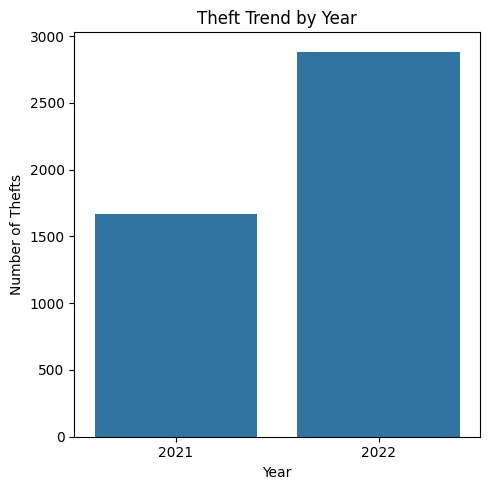

In [80]:
# --- Plot Yearly Theft Trend ---
plt.figure(figsize=(5, 5))
sns.barplot(x=yearly_trend.index, y=yearly_trend.values)
plt.title("Theft Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Thefts")
plt.tight_layout()
plt.show()

In [39]:
monthly_trend

month
January      740
February     763
March       1053
April        329
October      464
November     560
December     644
dtype: int64

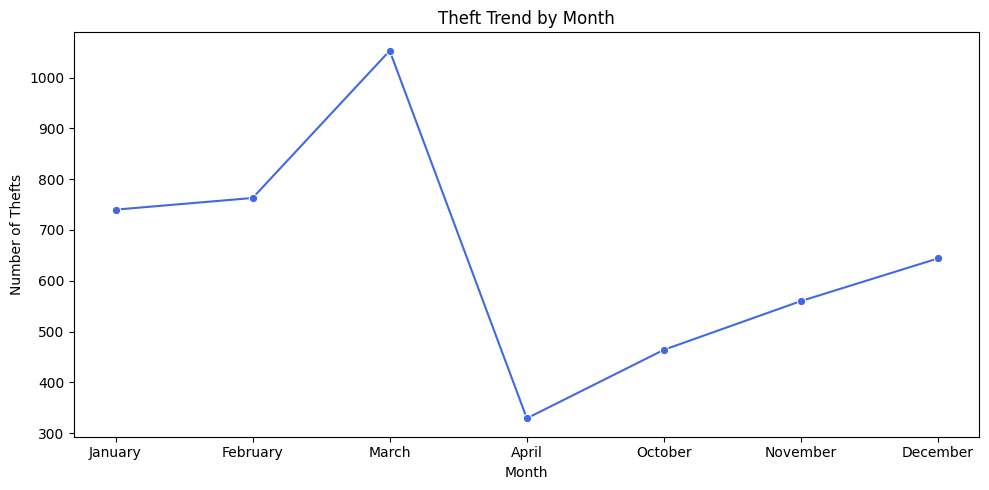

In [46]:
# --- Plot Monthly Theft Trend ---
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", color='royalblue')
plt.title("Theft Trend by Month")
plt.xlabel("Month")
plt.ylabel("Number of Thefts")
plt.tight_layout()
plt.show()

#### Key Insights:
- **March** had the **highest number of thefts (1,053)**, significantly more than any other month in the dataset.
- **January** and **February** also had relatively high numbers (740 and 763, respectively).
- **April** showed the **lowest theft count (329)**, which marks a sharp drop after March.
- Toward the end of the year, thefts seem to **rise again** — from **464 in October to 644 in December**.

#### Possible Explanations:
- The early-year spike (Jan–Mar) may be due to seasonal patterns, possibly linked to post-holiday vulnerabilities or weather conditions that affect crime rates.
- The increase in thefts toward the **end of the year** could be related to the festive season, which might lead to more opportunities for theft.
- There is a noticeable gap in the data for the middle months (May–September). I plan to explore whether this trend holds for the missing months or if the data is incomplete.

In [40]:
daily_trend

day
Monday       767
Tuesday      711
Wednesday    629
Thursday     619
Friday       655
Saturday     577
Sunday       595
dtype: int64

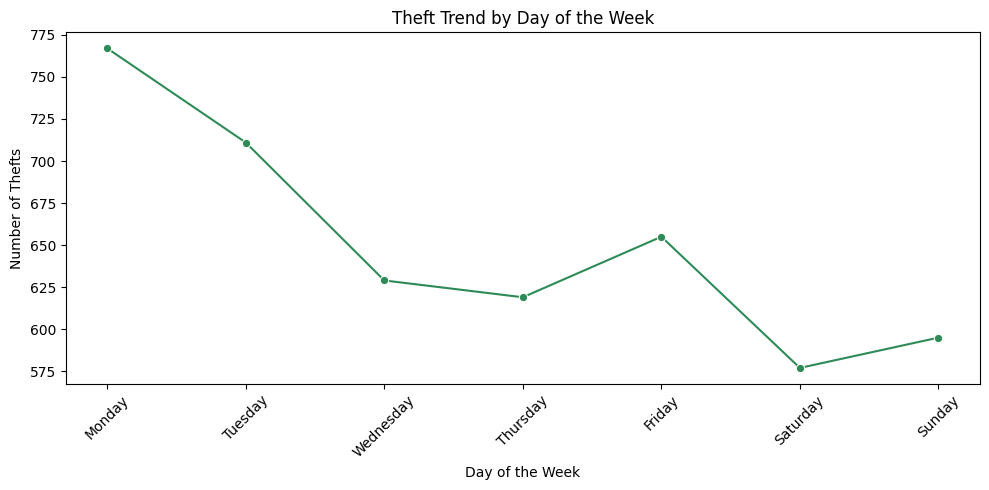

In [47]:
# --- Plot Daily Theft Trend ---
plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_trend.index, y=daily_trend.values, marker="o", color='seagreen')
plt.title("Theft Trend by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Thefts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Key Insights:
- **Monday** had the **highest number of thefts (767)**, making it the most active day for vehicle thefts.
- **Tuesday** followed closely with **711 thefts**, while the numbers gradually decreased through the rest of the week.
- The lowest theft count was on **Saturday (577)**, with **Sunday (595)** slightly higher but still near the bottom.
- **Wednesday**, **Thursday**, and **Friday** all had theft counts ranging from **619 to 655**, indicating a more consistent mid-week trend.

#### Possible Explanations:
- **Mondays** may have higher theft counts due to factors like increased traffic after the weekend or people being less vigilant at the start of the week.
- The drop in thefts on **Saturdays** might reflect greater public activity and increased security, as people are more likely to be out and about.
- The trend seems relatively stable in the middle of the week, which could be linked to weekday routines or patterns in criminal behavior.

### **Theft By Make, Model and Color**

In [64]:
## Theft by Make
make_theft = df.groupby(["make_name"]).size().sort_values(ascending = False).reset_index().head(10)
print("Top 10 Stolen Make ")
print(make_theft)

Top 10 Stolen Make 
    make_name    0
0      Toyota  716
1     Trailer  543
2      Nissan  482
3       Mazda  433
4        Ford  312
5       Honda  271
6  Mitsubishi  204
7      Subaru  202
8      Suzuki  164
9      Holden  160


C:\Users\Data Professor\AppData\Local\Temp\ipykernel_15564\3032045300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=make_model, x= 0, y="make_name", palette='viridis')  # Horizontal bar plot


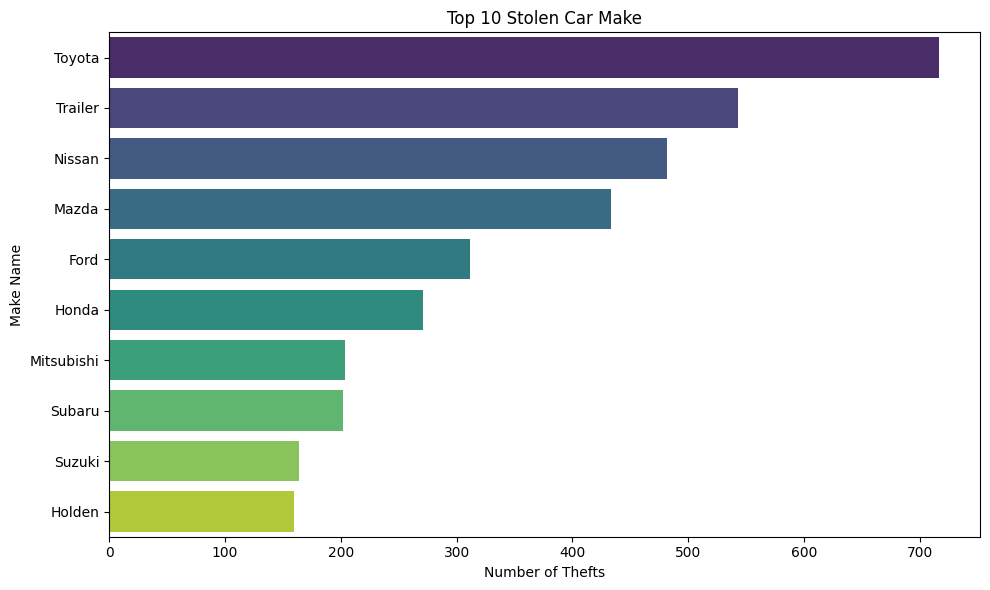

In [69]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=make_theft, x= 0, y="make_name", palette='viridis')  # Horizontal bar plot
plt.title("Top 10 Stolen Car Make")
plt.xlabel("Number of Thefts")
plt.ylabel("Make Name")
plt.tight_layout()
plt.show()

### Key Insights:
- **Toyota** is the most frequently stolen car make, with a total of **716 thefts**.
- The **Trailer** make comes second, with **543 thefts**.
- **Nissan**, **Mazda**, and **Ford** also appear in the top 5, with **482**, **433**, and **312 thefts** respectively.
- The least stolen in the top 10 is **Holden**, with **160 thefts**.

This data could be useful for further analysis to understand which makes are targeted most by car thieves, potentially leading to investigations or preventive measures for these makes.

In [94]:
## Theft by Model Year
model_theft = df.groupby(["model_year"]).size().sort_values(ascending = False).reset_index().head(10)
print("Top 10 Stolen Model Year ")
print(model_theft)

Top 10 Stolen Model Year 
   model_year    0
0        2005  362
1        2006  333
2        2007  251
3        2004  238
4        2008  190
5        2002  181
6        2003  173
7        1998  159
8        1996  156
9        2001  152


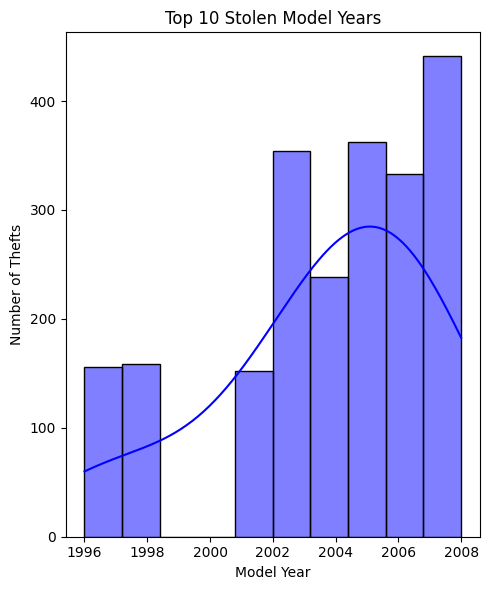

In [99]:
# Create the histogram plot
plt.figure(figsize=(5, 6))
sns.histplot(model_theft, x='model_year', weights=0, bins=10, kde=True, color='blue', edgecolor='black')
plt.title("Top 10 Stolen Model Years")
plt.xlabel("Model Year")
plt.ylabel("Number of Thefts")
plt.tight_layout()
plt.show()

### Key Insights:
- **2005** and **2006** model years are the most frequently stolen, with **362** and **333 thefts** respectively. These vehicles may have been targeted due to a combination of market demand, age, and potentially lower security features compared to newer models.
- **2007** and **2004** model years also rank highly, with **251** and **238 thefts**, suggesting that mid-2000s vehicles are still vulnerable to theft.
- There is a noticeable drop in thefts for vehicles from **2008** and beyond, with **190** reported thefts for the 2008 model. This likely reflects the implementation of better security measures in newer vehicles.
- **Older models**, such as **2002**, **2003**, and **1998**, still face a considerable number of thefts, ranging from **181** to **159**. These vehicles might be targeted for their spare parts or due to their age, making them more susceptible to theft.
- **1996** and **2001** models are less frequently stolen, with **156** and **152** thefts, possibly due to their lower resale value and less demand.

### Conclusion:
The data suggests that **mid-2000s vehicles** (2005-2007) are the most frequently stolen, likely due to a combination of high demand, age, and lower security compared to newer models. Newer vehicles (post-2008) are less likely to be stolen, possibly due to improvements in vehicle security systems.

In [86]:
## Theft by Model
color_theft = df.groupby(["color"]).size().sort_values(ascending = False).reset_index().head(10)
print("Top 10 Stolen Car Color ")
print(color_theft)

Top 10 Stolen Car Color 
    color     0
0  Silver  1272
1   White   934
2   Black   589
3    Blue   512
4     Red   390
5    Grey   378
6   Green   224
7    Gold    77
8   Brown    49
9  Yellow    39


C:\Users\Data Professor\AppData\Local\Temp\ipykernel_15564\3240944176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=color_theft, x= 0, y="color", palette='viridis')  # Horizontal bar plot


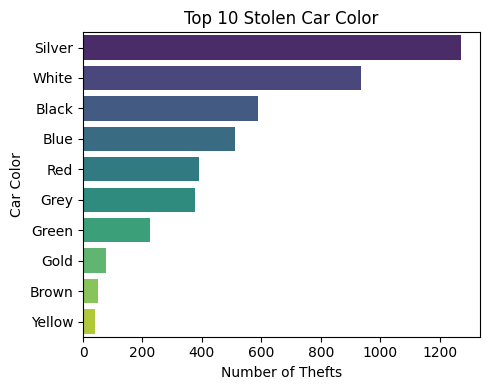

In [87]:
# Plotting the bar chart
plt.figure(figsize=(5, 4))
sns.barplot(data=color_theft, x= 0, y="color", palette='viridis')  # Horizontal bar plot
plt.title("Top 10 Stolen Car Color")
plt.xlabel("Number of Thefts")
plt.ylabel("Car Color")
plt.tight_layout()
plt.show()

### Key Insights:
- **Silver** is the most common color among stolen cars, with **1272 thefts** reported.
- **White** follows closely with **934 thefts**, and **Black** is third with **589 thefts**.
- **Blue** and **Red** cars are also frequently stolen, with **512** and **390 thefts**, respectively.
- **Grey** is another common stolen color, with **378 thefts**.
- **Green**, **Gold**, **Brown**, and **Yellow** cars are much less likely to be stolen, with **224**, **77**, **49**, and **39 thefts**, respectively.

This data suggests that silver, white, and black are more commonly targeted for theft. This could be due to factors like popularity or resale value in the market.

### **Geographic Theft Analysis**

region
Auckland              1638
Canterbury             660
Bay of Plenty          446
Wellington             420
Waikato                371
Northland              234
Gisborne               176
Otago                  139
Manawatū-Whanganui     139
Taranaki               112
Name: count, dtype: int64


C:\Users\Data Professor\AppData\Local\Temp\ipykernel_15564\2453419651.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_theft.values, y=region_theft.index, palette='Reds_r')


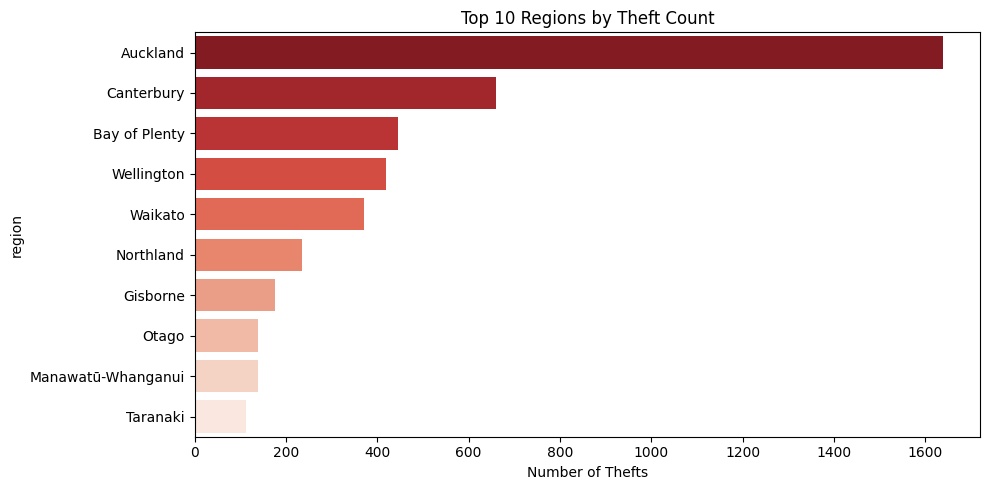

In [71]:
## Geographic theft analysis
region_theft = df['region'].value_counts().head(10)
print(region_theft)

# Plot heatmap-like bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=region_theft.values, y=region_theft.index, palette='Reds_r')
plt.title('Top 10 Regions by Theft Count')
plt.xlabel('Number of Thefts')
plt.tight_layout()
plt.show()


### Key Insights:
- **Auckland** leads with the highest number of car thefts, with **1638 thefts** reported.
- **Canterbury** is second, with **660 thefts**, and **Bay of Plenty** follows with **446 thefts**.
- The region with the lowest number of thefts in the top 10 is **Taranaki**, with **112 thefts**.
- **Wellington**, **Waikato**, and **Northland** each have significant theft counts, indicating these regions are also high-risk areas for car theft.
- **Gisborne** and **Otago** are in the middle range, with **176** and **139 thefts**, respectively.

This data could help to pinpoint areas that might require increased police presence, surveillance, or public awareness campaigns to prevent car thefts.

# **Conclusion**

After conducting a detailed analysis of the car theft data, I have identified several key insights that provide a deeper understanding of the patterns in vehicle thefts. Here are the major findings from my analysis:

1. **Yearly Trends**:
   - The year 2022 saw a sharp increase in thefts, with a total of 2,885 reported incidents, compared to 1,668 in 2021. This suggests a growing problem in recent times, which may warrant further investigation into the causes behind this rise.

2. **Monthly Patterns**:
   - March had the highest number of thefts, with 1,053 reported incidents, likely due to seasonal factors or post-holiday vulnerabilities. In contrast, April saw the fewest thefts, with only 329. Interestingly, the theft numbers appear to rise again toward the end of the year, possibly correlating with the festive season.

3. **Weekly Trends**:
   - Mondays were the most active days for thefts, with 767 incidents reported. This could be due to increased traffic and lower vigilance at the start of the week. On the other hand, Saturdays had the least number of thefts, potentially due to greater public activity and increased security.

4. **Make-Model Trends**:
   - **Toyota** topped the list as the most frequently stolen make, with 716 thefts. This was followed by **Trailer** and **Nissan**, which were also commonly targeted. The data suggests that certain makes are more prone to theft, likely due to factors like demand, popularity, and resale value.

5. **Model Year Patterns**:
   - Vehicles from the **2005 and 2006 model years** were the most stolen, with 362 and 333 incidents, respectively. This could be due to their age, lower security features, and continued demand for parts. Newer vehicles (post-2008) showed a decline in thefts, possibly due to improved security systems.

6. **Color Preferences**:
   - **Silver** emerged as the most stolen car color, followed by **White** and **Black**. This could be attributed to the higher popularity of these colors, which may make them more attractive targets for thieves. Meanwhile, **Gold**, **Brown**, and **Yellow** vehicles were less likely to be stolen.

7. **Regional Distribution**:
   - **Auckland** recorded the highest number of car thefts, with 1,638 incidents. Other regions such as **Canterbury** and **Bay of Plenty** also saw significant theft counts. These areas could benefit from targeted interventions to reduce theft rates.

## **Recommendations**

Based on my analysis, I propose the following actionable recommendations to help reduce vehicle thefts:

1. **Enhanced Surveillance and Policing in High-Theft Areas**:
   - Regions such as **Auckland**, **Canterbury**, and **Bay of Plenty** should increase police presence and surveillance, especially in high-risk areas, to deter thefts. Community awareness campaigns could also be useful in educating the public about car theft prevention.

2. **Targeted Security Measures for Popular Makes and Model Years**:
   - Given that **Toyota** and mid-2000s model years (2005-2007) are the most frequently stolen, car owners in these categories should be encouraged to install additional security measures, such as steering wheel locks, GPS tracking devices, and alarm systems.

3. **Seasonal Precautions**:
   - The increase in thefts during the first quarter of the year (January to March) and the end of the year (October to December) suggests that thieves may exploit specific times. Authorities should focus on public awareness campaigns during these months, urging vigilance and extra precautions, particularly during the festive season.

4. **Promote the Use of Vehicle Identification Technology**:
   - As older vehicles (1996-2005 models) are frequently targeted, I recommend encouraging vehicle owners to use visible or hidden identifiers (like VIN etching) and modern anti-theft technology to deter thieves.

5. **Encourage Color-Related Theft Prevention**:
   - Since **Silver**, **White**, and **Black** are the most commonly stolen colors, car owners of these colors should be encouraged to take extra precautions, such as parking in well-lit areas or using steering locks, to minimize the risk of theft.

By implementing these strategies, authorities and car owners can work together to mitigate the rising trend of car thefts and protect valuable assets.
